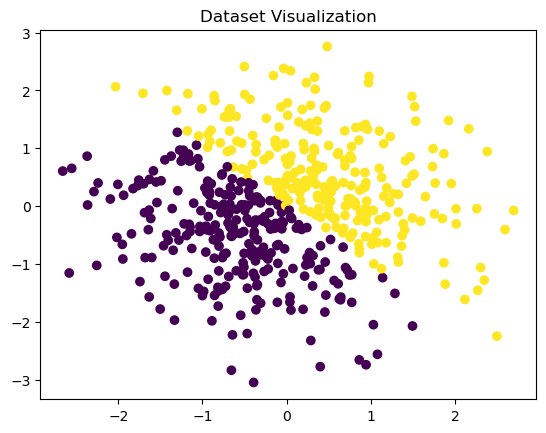

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Create a simple dataset
np.random.seed(0)
n_samples = 500

# Generate features
X = np.random.randn(n_samples, 2)  # 500 samples, 2 features

# Generate labels (0 or 1)
y = np.where(X[:, 0] + X[:, 1] > 0, 1, 0)

# Visualize the dataset
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.title("Dataset Visualization")
plt.show()


Accuracy: 0.99


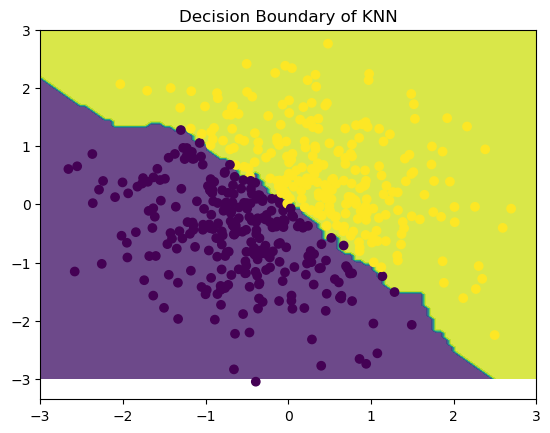

In [2]:
from scipy.spatial import distance

class KNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)

    def _predict(self, x):
        # Compute distances between x and all examples in the training set
        dists = [distance.euclidean(x, x_train) for x_train in self.X_train]
        # Sort by distance and return indices of the first k neighbors
        k_indices = np.argsort(dists)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        # Return the most common class label
        most_common = np.bincount(k_nearest_labels).argmax()
        return most_common

# Initialize and train the KNN model
knn = KNN(k=5)
knn.fit(X, y)

# Make predictions
y_pred = knn.predict(X)

# Calculate accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Visualize the decision boundary
xx, yy = np.meshgrid(np.linspace(-3, 3, 100), np.linspace(-3, 3, 100))
grid = np.c_[xx.ravel(), yy.ravel()]
probs = knn.predict(grid).reshape(xx.shape)

plt.contourf(xx, yy, probs, alpha=0.8, cmap='viridis')
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.title("Decision Boundary of KNN")
plt.show()